<a href="https://colab.research.google.com/github/hugomilesi/E2E_customer_churn_analysis/blob/updated_model/data_wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
import plotly
import seaborn as sns
import os
from dotenv import load_dotenv
import json
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
# data normalization and preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE

sequential_palette = ["#115f9a", "#1984c5", "#22a7f0", "#48b5c4", "#76c68f", "#a6d75b", "#c9e52f", "#d0ee11", "#d0f400"]
categorical_palette = ["#e60049", "#0bb4ff", "#50e991", "#e6d800", "#9b19f5", "#ffa300", "#dc0ab4", "#b3d4ff", "#00bfa0"]
plt.style.use('dark_background')



In [68]:
import dotenv
%load_ext dotenv
%dotenv

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [69]:
key = os.environ.get('KAGGLE_KEY')
kaggle_info = {
    "username": "hugoguilhermepenco",
    "key":key
}

# Write the dictionary to a JSON file
with open('kaggle.json', 'w') as outfile:
    json.dump(kaggle_info, outfile)

In [70]:
!kaggle datasets download -d blastchar/telco-customer-churn

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
telco-customer-churn.zip: Skipping, found more recently modified local copy (use --force to force download)


In [71]:
!unzip -o telco-customer-churn.zip

'unzip' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


In [72]:
from zipfile import ZipFile
ZipFile("telco-customer-churn.zip").extractall()

In [73]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [75]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [76]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

- Total charges is wrongly formatted.
- Senior Citizen column is differently formatted from the others.
- CustomerID won't be used in this analysis.

In [77]:
# lowercasing column names for easy work
df.columns = [col.lower()for col in df.columns]


df["totalcharges"] = df["totalcharges"].replace(r' ', np.nan)
df["totalcharges"] = df["totalcharges"].astype(float)

df['seniorcitizen'].replace({0: 'No', 1: 'Yes'}, inplace=True)
df['seniorcitizen'] = df['seniorcitizen'].astype('object')

df = df.drop('customerid', axis = 1)

C:\Users\PICHAU\AppData\Local\Temp\ipykernel_18920\793211674.py:8: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [78]:
# Creating a flag variable dor churn
df['churn_flag'] = df['churn'].map({"No":0, "Yes":1})

# Information About the dataset
CustomerID - customer ID.

Gender - Whether the customer is a male or a female.

SeniorCitizen - whether the customer is a senior citizen or not (1,0)

Partner - whether the customer has a partner ot not (Yes, No)

Dependents - Whether the customer has dependents or not(Yes, No).

Tenure - Number of months the customer has stayed with the company.

PhoneService - whether the customer has a phone service or not (Yes, No)

MultipleLines - Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService - Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service).

OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service).

DeviceProtection - Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport - Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV - Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies - Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract - The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)

PaymentMethod - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges - The amount charged to the customer monthly

TotalCharges - The total amount charged to the customer

Churn - Whether the customer churned or not (Yes or No)



In [79]:
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,...,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,churn_flag
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [80]:
# checking for duplicates
df.duplicated().sum()

22

In [81]:
df.isnull().sum()

gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
churn_flag           0
dtype: int64

In [82]:
df = df.dropna()

In [83]:
# stores only categorical data
categorical = df.select_dtypes(include = ['object']).columns
categorical

# stores only quatitative data
quant = df.select_dtypes(include = ['float64', 'int64']).columns

print(f'This dataset contains {len(categorical)} categorical data and {len(quant)} quantitative data')
print(f'Categorical columns are: {list(categorical)} \n\nQuanticative columns are: {list(quant)} ')


This dataset contains 17 categorical data and 4 quantitative data
Categorical columns are: ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'churn'] 

Quanticative columns are: ['tenure', 'monthlycharges', 'totalcharges', 'churn_flag'] 


In [84]:
color_discrete_map = {'No': categorical_palette[2], 'Yes': categorical_palette[0]}


fig = px.scatter(
    x=df['monthlycharges'],
    y=df["totalcharges"],
    color = df["churn"],
    color_discrete_map=color_discrete_map
)

fig.update_layout(template = "plotly_dark", title = "Monthly x Total Charges", title_font = dict(size=24), showlegend=True)


fig.show()

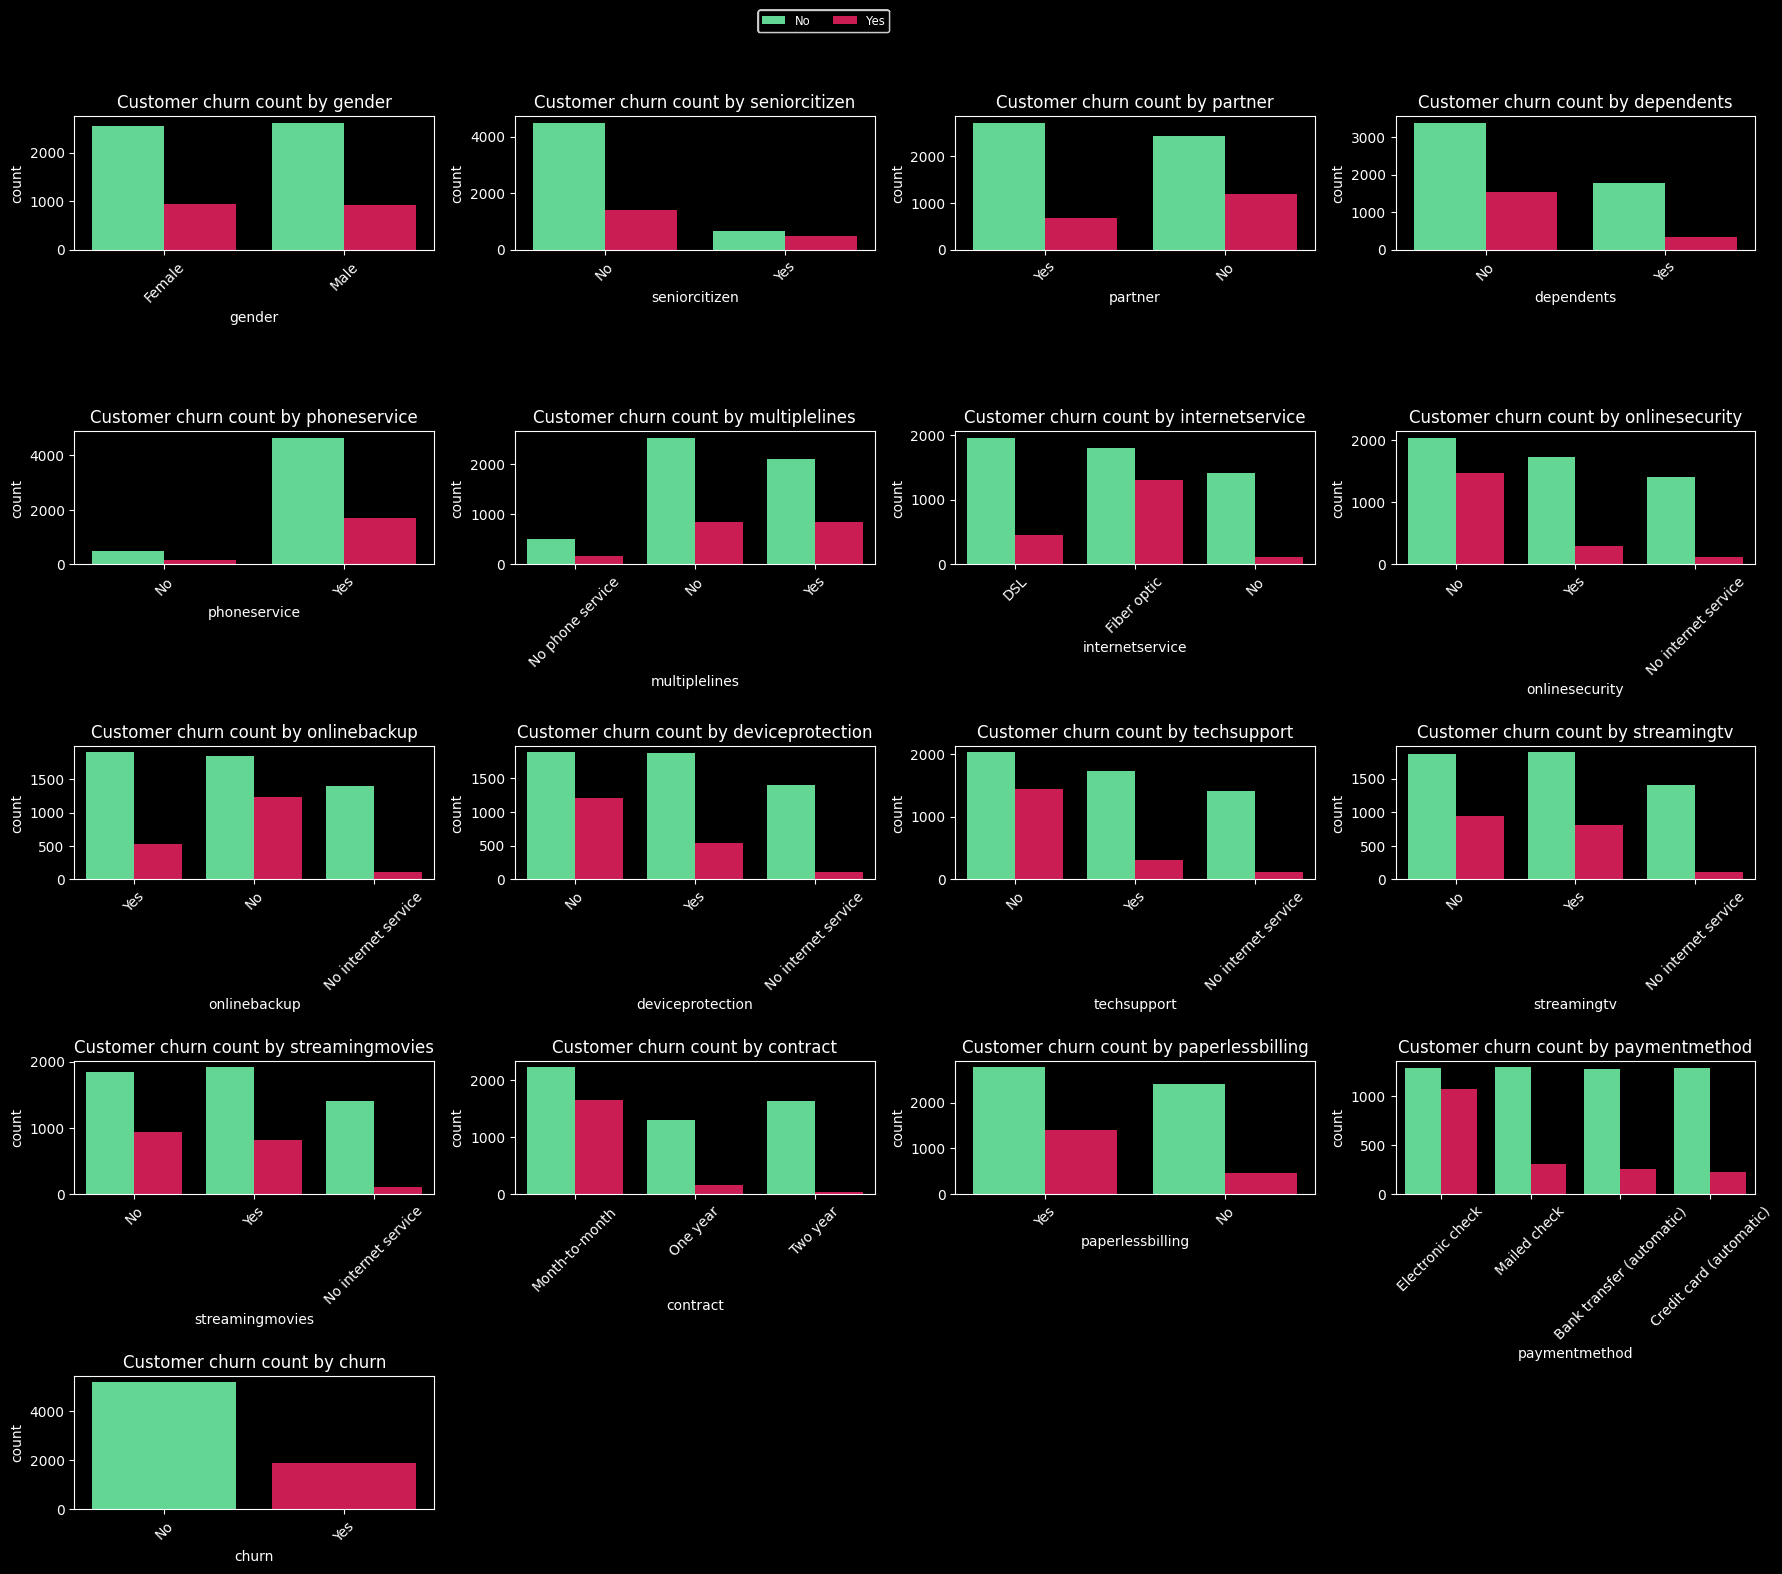

In [85]:

custom_palette = [categorical_palette[2], categorical_palette[0]]
dist_df = df.drop('churn_flag', axis = 1)

num_rows = 5
num_cols = 4

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 15))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over each categorical feature
for i, feat in enumerate(categorical):
    # Plot countplot for each feature
    sns.countplot(data=dist_df, x=feat, hue='churn', palette=custom_palette, ax=axes[i])
    axes[i].set_title(f'Customer churn count by {feat}')
    axes[i].tick_params(axis='x', rotation=45)
    try:
      axes[i].legend_.remove()
    except:
      continue

    fig.legend(handles=axes[0].get_legend_handles_labels()[0],
           labels=axes[0].get_legend_handles_labels()[1],
           loc='upper right',
           fontsize='small',
           bbox_to_anchor=(0.5, 1.05),  # Position legend outside the subplots
           fancybox=True, shadow=True, ncol=2
               )


# Remove any unused subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [86]:
color_discrete_map = {'No': categorical_palette[2], 'Yes': categorical_palette[0]}


fig = px.histogram(df, x="tenure", color="churn", template = 'plotly_dark', color_discrete_map=color_discrete_map, opacity = 0.7, nbins = 20)

fig.update_layout(title = "Tenure Distribution", title_font = dict(size=24), showlegend=True)
fig.show()

## Conclusions:

- Gender has no influence on whether the customer will churn or not.

- A high rate of customer churns are related to Eletronic check as payment method.

- A higher number of customers churn in the first month (court) with the company than any other time.

- Churns are concetrated between an interval of 0 and 30 months.

- Customers that have internet service with Fiber optic are more likely to churn.

- Customer churn rate might be lower for customers with dependents.

- Customers with a higher monthly charge are more likely to churn.

- Customers without online security, online backup, device protecion and tech support tend to churn more often than their counterparts.

- Customer churn rate appears to be higher for younger customers.


In [87]:
label_colors = dict(colors=[categorical_palette[2], categorical_palette[0]])

churn_pct = df["churn"].value_counts().reset_index(name = 'count')
fig = go.Figure(data=[go.Pie(labels=churn_pct['churn'], values=churn_pct["count"], hole=.3)])

fig.update_layout(template = "plotly_dark", width = 800, title = "Churn vs Unchurn Customers Distribution", title_font = dict(size=24))
fig.update_traces(marker = label_colors)
fig.show()

## Imbalanced Dataset
When training a machine learning model with an imbalanced dataset, where one class has significantly more examples than others, there are several potential risks:

1. Biased Model
 - The model prioritizes learning to predict the majority class well, neglecting the minority class.
 - This leads to poor performance on the minority class, resulting in high
 false negatives and low precision.

2. Difficulty in Learning Complex Patterns:
 - With fewer examples, the model strugglesto learn complex patterns of the minority class.
 - This can lead to overfitting to the specific training data, resulting in poor generalization to unseen data.

## POSSIBLE SULUTION
- To solve this, we need to implement a technique called **SMOTE(Synthetic Minority Oversampling Technique)** which generates synthetic data points for the minority class, SMOTE helps balance the class distribution in the training data. This allows the model to focus on learning patterns from both the majority and minority classes more effectively.

## SMOTE
Ok, so how SMOTE works:

1. SMOTE Identifies the class with the fewest examples as the minority class.
2. Randomly selects existing minority samples.
3. SMOTE uses k-Nearest Neighbors (kNN) to identify the k nearest neighbors of the chosen minority class sample in the feature space.
4. Then SMOTE randomly selects one of the k nerest neighbors and calculate the difference(vector) between the original minority class sample and its chosen neighbor.

### Here's the key idea:

- The new synthetic data point lies along the line connecting the original sample and its neighbor in the feature space.
- This ensures the newly generated point shares similar characteristics with the original minority class sample.

Visual Representation:

![Alt text](https://dfzljdn9uc3pi.cloudfront.net/2023/cs-1280/1/fig-2-1x.jpg)

### Encoding

In [88]:
# i will use churn flag as numerical feature
categorical = categorical[:-1]
categorical

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod'],
      dtype='object')

In [89]:
mms = MinMaxScaler() # normalization

#df['Churn'] = np.where(df['Churn'] == 'Churn_yes', 1, 0)

# splitting categorical columns from numeric for encoding
encoded = pd.get_dummies(df[categorical], dtype = int)
numeric = df[quant] # only numeric values

# normalizing numeric data
for num in quant:
  numeric[num] = mms.fit_transform(numeric[num].values.reshape(-1, 1))

# merging the encoded values with numerics again
all_data = pd.concat([encoded, numeric], axis = 1)

C:\Users\PICHAU\AppData\Local\Temp\ipykernel_18920\3982690301.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\PICHAU\AppData\Local\Temp\ipykernel_18920\3982690301.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\PICHAU\AppData\Local\Temp\ipykernel_18920\3982690301.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

### Applying SMOTE

In [90]:
churn_counts = df['churn_flag'].value_counts()
churn_ratio = churn_counts[0] / churn_counts[1]
print(f'Rate between customers and churners is {churn_ratio}')

Rate between customers and churners is 2.7624398073836276


In [91]:
# samples
x = all_data.drop('churn_flag', axis = 1)

# target
y = all_data['churn_flag']

sm = SMOTE()

# oversampling
x_resampled, y_resampled = sm.fit_resample(x, y)


In [92]:
# checking churners rate again
oversampled = pd.concat([y_resampled, x_resampled], axis = 1)

churn_counts = oversampled['churn_flag'].value_counts()
churn_ratio = churn_counts[0]/churn_counts[1]
print(f'rate between customers and churners is now: {churn_ratio}')

rate between customers and churners is now: 1.0


In [93]:
oversampled['churn_flag'].value_counts().reset_index()

,churn_flag,count
0,0.0,5163
1,1.0,5163


In [94]:
import plotly.graph_objects as go

# Define data for the two pie charts
churn_pct = df["churn"].value_counts().reset_index(name='count')
oversampled_pct = oversampled['churn_flag'].value_counts().reset_index()

# Create subplots with two columns
fig = go.Figure()

# Add first pie chart
fig.add_trace(go.Pie(labels=churn_pct['churn'], values=churn_pct["count"], hole=0.3,
                     marker=dict(colors=[categorical_palette[2], categorical_palette[0]]),
                     domain={'x': [0, 0.5]},
                     name='Churn vs Unchurn Customers Distribution'))

# Add second pie chart
fig.add_trace(go.Pie(labels=oversampled_pct['churn_flag'], values=oversampled_pct["count"], hole=0.3,
                     marker=dict(colors=[categorical_palette[2], categorical_palette[0]]),
                     domain={'x': [0.5, 1]},
                     name='',
                     showlegend=False))
fig.update_layout(template="plotly_dark", width=1200, title_text="Churn vs Unchurn Customers Distribution", title_font=dict(size=24),
                  annotations=[
                      dict(text="Before SMOTE", x=0.22, y=1, font=dict(size=14)),

                      dict(text='After SMOTE', x=0.78, y=1, font=dict(size=14))
                  ])

# Show the plot
fig.show()


In [95]:
oversampled

,churn_flag,gender_Female,gender_Male,seniorcitizen_No,seniorcitizen_Yes,partner_No,partner_Yes,dependents_No,dependents_Yes,phoneservice_No,...,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,tenure,monthlycharges,totalcharges
0,0.0,1,0,1,0,0,1,1,0,1,...,0,0,1,0,0,1,0,0.000000,0.115423,0.001275
1,0.0,0,1,1,0,1,0,1,0,0,...,0,1,0,0,0,0,1,0.464789,0.385075,0.215867
2,1.0,0,1,1,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0.014085,0.354229,0.010310
3,0.0,0,1,1,0,1,0,1,0,1,...,0,1,0,1,0,0,0,0.619718,0.239303,0.210241
4,1.0,1,0,1,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0.014085,0.521891,0.015330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10321,1.0,0,1,1,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0.683479,0.665527,0.477575
10322,1.0,0,0,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0.073887,0.568200,0.051355
10323,1.0,0,1,0,1,1,0,1,0,0,...,0,0,1,0,0,1,0,0.014085,0.262413,0.008626
10324,1.0,0,1,1,0,1,0,1,0,1,...,0,1,0,1,0,0,0,0.003794,0.078710,0.002271


In [96]:
# saving the preprocessed and encoded data
oversampled.to_csv("data/churn_data_encoded.csv", index = False)